# Data Preprocessing

# Content

- Data Preprocessing
- Load data from postgres
- Data Information
- Data Manipulation
    - Missing Value Manipulation
    - Fixing missing values
    - Droping Duplicate values
- Show Data Description
- Outliers
    - Fix Outliers
- Save Cleaned Data

# Data Preprocessing

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing script modules from ../scripts
# Adding scripts path
import sys, os
sys.path.insert(0, '../scripts/')
from data_preProcessing import data_preProcessing_script
from data_manipulator import DataCleaner
from data_exploration import exploration

# Load data from postgres

In [4]:
import psycopg2 as pg

In [5]:
engine = pg.connect("dbname='postgres' user='postgres' host='127.0.0.1' port='5432' password='abel6464'")
df_cpy = pd.read_sql('select * from merged LIMIT 50000', con=engine)

In [6]:
df = df_cpy.copy(deep=True)

In [7]:
df.head()

,game_key,campaign_id,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,colors_clickthr_green,colors_clickthr_blue,colors_clickthr_proportion,colors_clickthr_saturation,colors_clickthr_luminosity,videosd,eng_type,direction,adunit_sizex,adunit_sizey
0,adunit-engagement-plus-ihop-evergreen-olo-drag...,y7nfoz9,impression,320,480,qsigqvmg,109e2832-91d4-4048-a4d4-648cb96ceff1,2021-06-12 05:33:07.915,United States,jp.icepop.steppuzzle,...,None,None,None,None,None,None,None,None,None,None
1,adunit-engagement-plus-ihop-evergreen-olo-drag...,y7nfoz9,impression,300,250,lambsbtu,e3a69f8d-1c36-4d9c-ad10-d541215c7611,2021-06-12 05:33:08.941,United States,www.zynga.com,...,None,None,None,None,None,None,None,None,None,None
2,adunit-engagement-plus-ihop-evergreen-olo-drag...,y7nfoz9,click-through-event,320,480,qsigqvmg,109e2832-91d4-4048-a4d4-648cb96ceff1,2021-06-12 05:33:10.515,United States,jp.icepop.steppuzzle,...,None,None,None,None,None,None,None,None,None,None
3,adunit-engagement-plus-ihop-evergreen-olo-drag...,y7nfoz9,impression,320,480,01jvgfk8,fad9beb5-1a4b-4b18-b0c0-c46a303648e0,2021-06-12 05:33:10.541,United States,com.easybrain.find.the.difference,...,None,None,None,None,None,None,None,None,None,None
4,adunit-engagement-plus-ihop-evergreen-olo-drag...,y7nfoz9,impression,320,480,2xzk6mo4,408ea62e-0c49-437d-8a25-da65aa6894ab,2021-06-12 05:33:12.107,United States,307184892,...,None,None,None,None,None,None,None,None,None,None


# Data Information

In [8]:
preprocess = data_preProcessing_script(df)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   game_key                                           50000 non-null  object        
 1   campaign_id                                        50000 non-null  object        
 2   type                                               50000 non-null  object        
 3   width                                              50000 non-null  object        
 4   height                                             50000 non-null  object        
 5   creative_id                                        50000 non-null  object        
 6   auction_id                                         50000 non-null  object        
 7   browser_ts                                         50000 non-null  datetime64[ns]
 8   geo_country     

In [9]:
print('unique column values')
df.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(33)

unique column values


browser_ts                                           49918
auction_id                                           44267
site_name                                             3101
creative_id                                            107
game_key                                                51
browser                                                 29
campaign_name                                           12
campaign_id                                             12
Gross Cost/Budget                                        8
enddate                                                  8
startdate                                                8
Description                                              8
Submission Date                                          8
Volume Agreed                                            8
Campaign Objectives                                      7
platform_os                                              7
Net Cost                                                

In [10]:
df.shape

(50000, 54)

# Data Manipulation

## Missing Value Manipulation

In [11]:
preprocess.colums_WithMissingValue()

['browser',
 'Delivery Requirements (Black/Audience/White List)',
 'Buy Rate (CPE)',
 'Volume Agreed',
 'Gross Cost/Budget',
 'Percentage',
 'Flat Fee',
 'labels_engagement',
 'labels_clickthr',
 'text_engagement',
 'text_clickthr',
 'colors_engagement_red',
 'colors_engagement_green',
 'colors_engagement_blue',
 'colors_engagement_proportion',
 'colors_engagement_saturation',
 'colors_engagement_luminosity',
 'colors_clickthr_red',
 'colors_clickthr_green',
 'colors_clickthr_blue',
 'colors_clickthr_proportion',
 'colors_clickthr_saturation',
 'colors_clickthr_luminosity',
 'videosd',
 'eng_type',
 'direction',
 'adunit_sizex',
 'adunit_sizey']

In [12]:
preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
game_key,0,0.0 %
campaign_id,0,0.0 %
type,0,0.0 %
width,0,0.0 %
height,0,0.0 %
creative_id,0,0.0 %
auction_id,0,0.0 %
browser_ts,0,0.0 %
geo_country,0,0.0 %
site_name,0,0.0 %


Text(0, 0.5, 'Features')

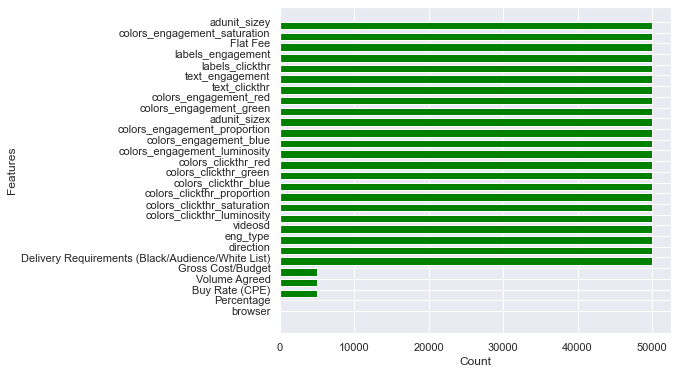

In [13]:
#cols_with_missing = [col for col in train.columns if train[col].isnull().any()]
cols_with_missing = df.isnull().sum()
cols_with_missing = cols_with_missing[cols_with_missing>0]
cols_with_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(7,6))  
width = 0.70 # the width of the bars 
ind = np.arange(len(cols_with_missing))  # the x locations for the groups
ax.barh(ind, cols_with_missing, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols_with_missing.index, minor=False)
plt.xlabel('Count')
plt.ylabel('Features') 

---
- We will remove missing values > 80%
- Since we have missing values on computer vision extracted data's, we will not drop them since they might have some insights even if they are > 80% missing
- There aren't much computer vision data collected for the same game key as in the inventory dataset. That might be some of the limitations of this dataset.
---

## Fixing missing values

In [14]:
df.drop(["Flat Fee"], axis=1, inplace=True)
df.drop(["Delivery Requirements (Black/Audience/White List)"], axis=1, inplace=True)

In [15]:
df['width'].fillna(df['width'].mode()[0], inplace = True)
df['height'].fillna(df['height'].mode()[0], inplace = True)
df['geo_country'].fillna(df['geo_country'].mode()[0], inplace = True)
df['device_type'].fillna(df['device_type'].mode()[0], inplace = True)
df['browser'].fillna(df['browser'].mode()[0], inplace = True)
df['Buy Rate (CPE)'].fillna(df['Buy Rate (CPE)'].median(), inplace = True)
df['Volume Agreed'].fillna(df['Volume Agreed'].median(), inplace = True)
df['Gross Cost/Budget'].fillna(df['Gross Cost/Budget'].median(), inplace = True)
df['Percentage'].fillna(df['Percentage'].median(), inplace = True)
df['Agency Fee'].fillna(df['Agency Fee'].mode()[0], inplace = True)
df['Net Cost'].fillna(df['Net Cost'].median(), inplace = True)
# 
df['labels_engagement'].fillna(df['labels_engagement'].mode()[0], inplace = True)
df['labels_clickthr'].fillna(df['labels_clickthr'].mode()[0], inplace = True)
df['text_engagement'].fillna(df['text_engagement'].mode()[0], inplace = True)
df['text_clickthr'].fillna(df['text_clickthr'].mode()[0], inplace = True)
# 
df['colors_engagement_red'].fillna(df['colors_engagement_red'].median(), inplace = True)
df['colors_engagement_green'].fillna(df['colors_engagement_green'].median(), inplace = True)
df['colors_engagement_blue'].fillna(df['colors_engagement_blue'].median(), inplace = True)
df['colors_engagement_proportion'].fillna(df['colors_engagement_proportion'].median(), inplace = True)
df['colors_engagement_saturation'].fillna(df['colors_engagement_saturation'].median(), inplace = True)
df['colors_engagement_luminosity'].fillna(df['colors_engagement_luminosity'].median(), inplace = True)
# 
df['colors_clickthr_red'].fillna(df['colors_clickthr_red'].median(), inplace = True)
df['colors_clickthr_green'].fillna(df['colors_clickthr_green'].median(), inplace = True)
df['colors_clickthr_blue'].fillna(df['colors_clickthr_blue'].median(), inplace = True)
df['colors_clickthr_proportion'].fillna(df['colors_clickthr_proportion'].median(), inplace = True)
df['colors_clickthr_saturation'].fillna(df['colors_clickthr_saturation'].median(), inplace = True)
df['colors_clickthr_luminosity'].fillna(df['colors_clickthr_luminosity'].median(), inplace = True)
# 
df['videosd'].fillna(df['videosd'].median(), inplace = True)
df['eng_type'].fillna(df['eng_type'].mode()[0], inplace = True)
df['direction'].fillna(df['direction'].mode()[0], inplace = True)
# 
df['adunit_sizex'].fillna(df['adunit_sizex'].median(), inplace = True)
df['adunit_sizey'].fillna(df['adunit_sizey'].median(), inplace = True)

KeyError: 0

In [ ]:
preprocess.get_column_based_missing_percentage()

# Droping Duplicate values

In [ ]:
# Duplicate
df[df.duplicated()].index
# Duplicate
df_copy[df_copy.duplicated()].index

In [ ]:
preprocess.drop_duplicates()

# Show Data Description

In [ ]:
preprocess.show_data_description()

In [ ]:
preprocess.show_datatypes()

In [ ]:
#Knowing the shapes of our datasets
print('Shapes of our datasets')
print('-----------------------')
print(f'Training dataset:{df.shape}')

In [ ]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

# Outliers

In [ ]:
from data_exploration import exploration
exploration = exploration()

In [ ]:
exploration.plot_box(df, "colors_engagement_green", "Outliers")

In [ ]:
exploration.plot_box(df, "Buy Rate (CPE)", "Outliers")

In [ ]:
exploration.plot_box(df, "colors_engagement_green", "Outliers")

# Fix Outliers

In [ ]:
from data_manipulator import DataCleaner
manipulator = DataCleaner(df)

In [ ]:
columns = ['Buy Rate (CPE)', 'Volume Agreed',
'Gross Cost/Budget', 'Percentage','Net Cost', 'colors_engagement_red',
'colors_engagement_green',
'colors_engagement_blue',
'colors_engagement_proportion',
'colors_engagement_saturation',
'colors_engagement_luminosity',
'colors_clickthr_red',
'colors_clickthr_green',
'colors_clickthr_blue',
'colors_clickthr_proportion',
'colors_clickthr_saturation',
'colors_clickthr_luminosity',
'adunit_sizex',
'adunit_sizey']

In [ ]:
manipulator.replace_outlier_with_median(df, columns)

# Saving new processed File

In [ ]:
df.to_csv('../data/processed_incl_missing.csv', index=False)
# df_copy.to_csv('../data/processed_drop_missing.csv', index=False)